# KHÁM PHÁ DỮ LIỆU

In [2]:
# import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Đọc dữ liệu từ file csv

df = pd.read_csv('data/mxmh_survey_results_clean.csv')
label_frequency = {0: 'Never', 1 : 'Rarely', 2: 'Sometimes', 3:  'Very frequently'}

df

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18,Spotify,4,No,No,No,Video game music,No,Yes,132,...,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
1,61,YouTube Music,2,Yes,No,Yes,Jazz,Yes,Yes,84,...,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
2,18,Spotify,4,Yes,No,No,R&B,Yes,No,107,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve
3,18,Spotify,5,Yes,Yes,Yes,Jazz,Yes,Yes,86,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve
4,18,YouTube Music,3,Yes,Yes,No,Video game music,Yes,Yes,66,...,Rarely,Rarely,Never,Never,Sometimes,4,8,6,0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,17,Spotify,2,Yes,Yes,No,Rock,Yes,Yes,120,...,Very frequently,Never,Rarely,Very frequently,Never,7,6,0,9,Improve
662,18,Spotify,1,Yes,Yes,No,Pop,Yes,Yes,160,...,Very frequently,Never,Never,Sometimes,Sometimes,3,2,2,5,Improve
663,19,Other streaming service,6,Yes,No,Yes,Rap,Yes,No,120,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2,2,2,2,Improve
664,19,Spotify,5,Yes,Yes,No,Classical,No,No,170,...,Never,Never,Never,Never,Sometimes,2,3,2,1,Improve


# Những câu hỏi để khám phá dữ liệu ?

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>1. Độ tuổi tham gia khảo sát là bao nhiêu ? Hãy vẽ biểu đồ histogram và chọn bins là bao nhiêu. Tại sao lại chọn bins như vậy?</b></font>

<font color="red"><b>Answer:</b></font> <font color="red">Độ tuổi tham gia khảo sát nằm trong khoảng từ 10 - 80. Chúng ta sẽ chọn bins = 35.</font>

<font color="red"><b>Explanation:</b></font> <font color="red">Giải thích </font>


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

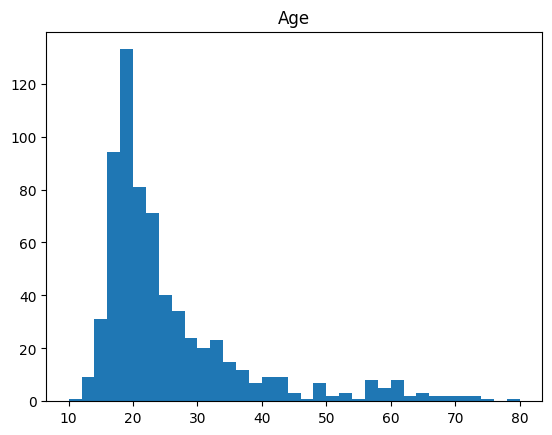

In [4]:
df.hist(['Age'], bins=35, grid=False)

<Axes: xlabel='Age'>

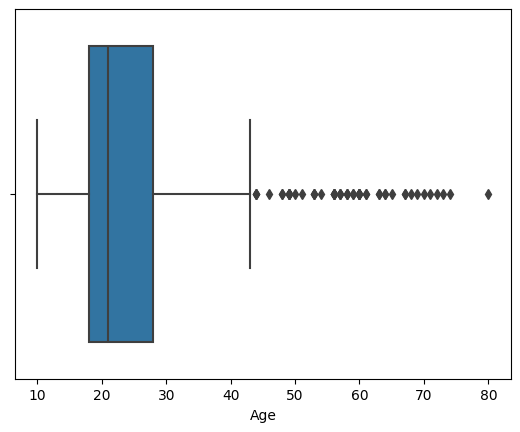

In [15]:
# Vẽ biểu đồ boxplot để miêu tả dữ liệu Age 
# print(df['Age'].describe().T)
sns.boxplot(x=df['Age'])

- Dựa vào biểu đồ boxplot và histogram. Chúng ta có thể thấy đa phần độ tuổi tham gia khảo sát đều ở độ tuổi từ 18 đến 28 tuổi.
- Độ tuổi thấp nhất tham gia khảo sát là 10 tuổi và cao nhất là 58 tuổi.
- Độ tuôi trung bình tham gia khảo sát là 24 tuổi.

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>2. Tìm hiểu về dịch vụ nghe nhạc được ưa thích nhất ?</b></font>

<font color="red"><b>Answer:</b></font> <font color="red">Dịch vụ nghe nhạc trực tuyến được yêu thích nhất là Spotify</font>

<font color="red"><b>Explanation:</b></font> <font color="red">Spotify được nhiều người tham gia khảo sát lựa chọn làm dịch vụ được yêu thích nhất (~ 62%)</font>
</div>


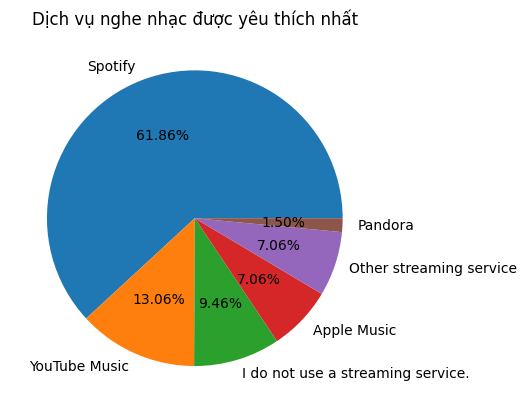

In [17]:
# Vẽ biểu đồ tròn để cho biết % của những dịch vụ nghe nhạc được yêu thích nhất 
# (Primary streaming service)
streaming_service = df['Primary streaming service'].value_counts()
plt.pie(streaming_service, labels=streaming_service.index, autopct='%.2f%%')
plt.title('Dịch vụ nghe nhạc được yêu thích nhất')
plt.show()

- Độ tuổi nghe nhạc trên các nền tảng là gì ? Trên mỗi nền tảng độ tuổi nghe nhạc có khác nhau không? 

Text(0.5, 1.0, 'Streaming services by Age')

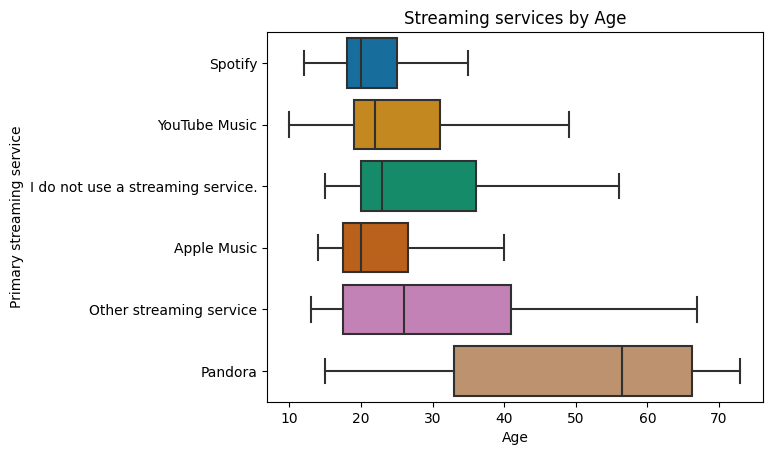

In [7]:
streamyByAge = sns.boxplot(data=df, y="Primary streaming service", x = "Age",
            showfliers = False,
            palette = "colorblind")

streamyByAge.set_yticklabels(streamyByAge.get_yticklabels(),rotation=0)
plt.title('Streaming services by Age')

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>3. Tìm hiểu số giờ nghe của người tham gia khảo sát ?  </b></font>

<font color="red"><b>Answer:</b></font> <font color="red">Câu trả lời</font>

<font color="red"><b>Explanation:</b></font> <font color="red">Giải thích </font>

</div>

c:\Users\Admin\anaconda3\envs\min_ds-env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


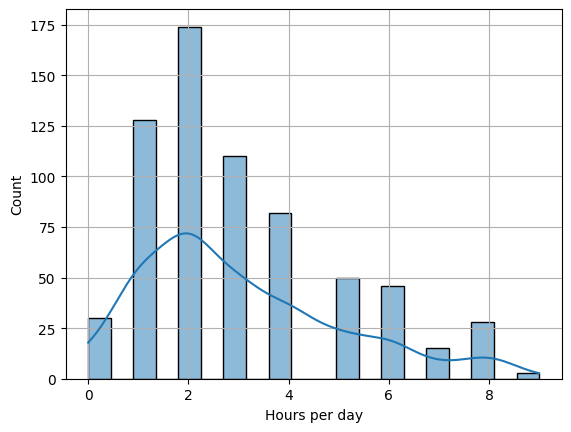

In [13]:
# Vẽ biểu đồ histogram cho biết phân bố của dữ liệu Hours per day 
import matplotlib.pyplot as plt

sns.histplot(df['Hours per day'], bins='auto', kde=True)
plt.grid(True)


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>4. Sở thích về âm nhạc theo độ tuổi </b></font>

</div>

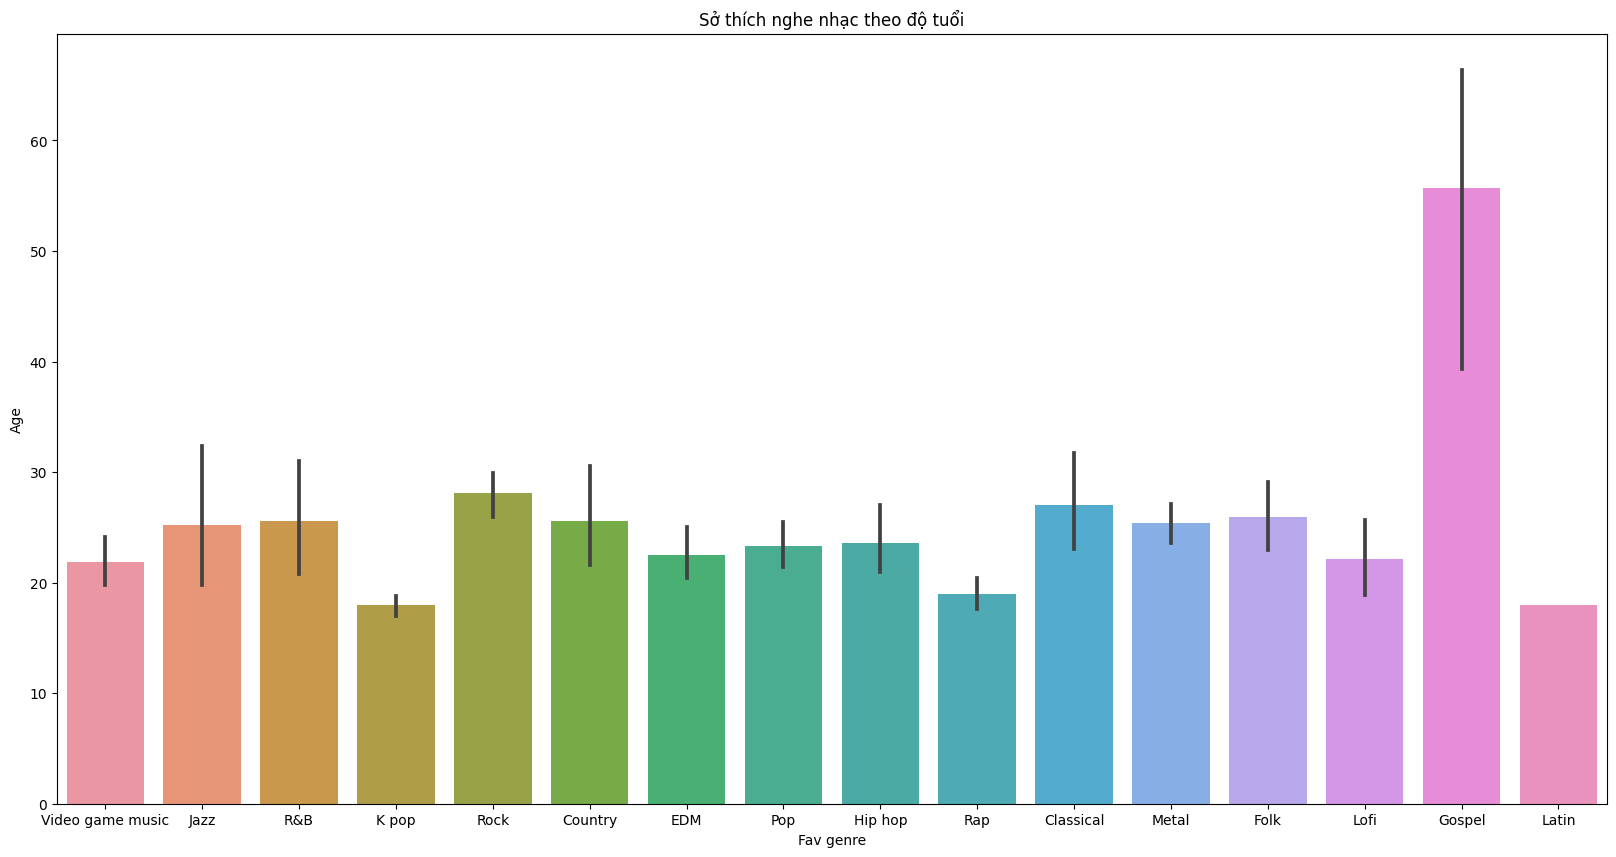

In [18]:
#Vẽ biểu đồ đường thể hiện xu hướng sở thích nghe nhạc theo độ tuổi
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x="Fav genre", y="Age")
plt.title('Sở thích nghe nhạc theo độ tuổi')
plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>5. Mọi người có thường nghe nhạc được viết bằng một ngôn ngữ không phải ngôn ngữ chính của họ hay không? </b></font>

<font color="red"><b>Answer:</b></font> <font color="red">Câu trả lời</font>

<font color="red"><b>Explanation:</b></font> <font color="red">Giải thích </font>

</div>

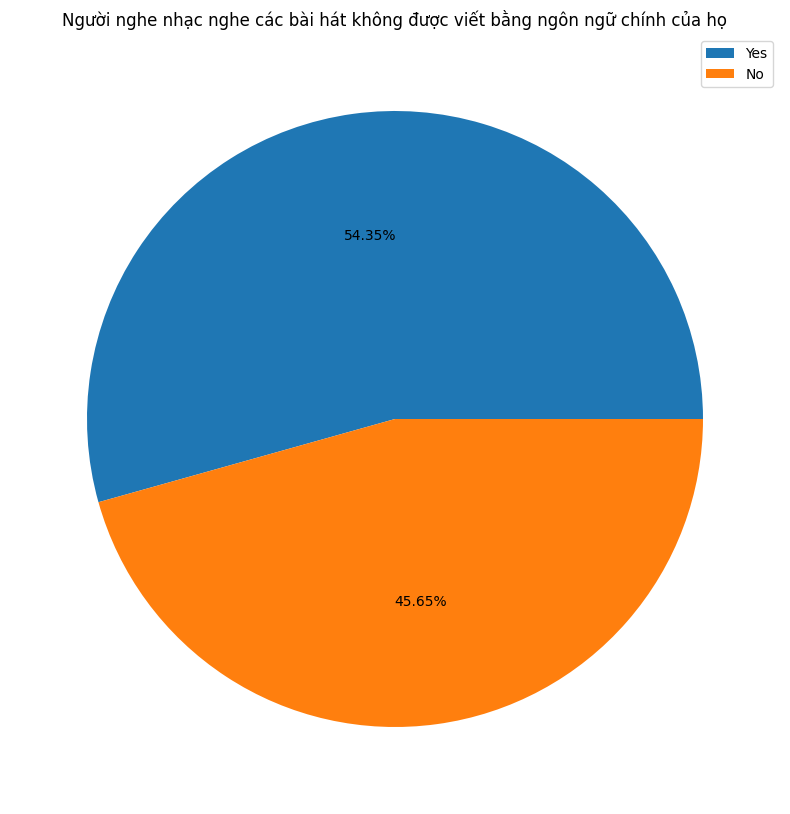

In [10]:
#Vẽ biểu đồ tròn thể hiện % người nghe nhạc nghe các bài hát không được viết bằng ngôn ngữ chính của họ
plt.figure(figsize=(20, 10))
size = df['Foreign languages'].value_counts(normalize=True)
label = ['Yes', 'No']
plt.pie(size, autopct='%.2f%%')
plt.legend(label, loc='best')
plt.title('Người nghe nhạc nghe các bài hát không được viết bằng ngôn ngữ chính của họ')
plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>6. Tần suất nghe nhạc của từng loại nhạc. </b></font>


</div>

C:\Users\Admin\AppData\Local\Temp\ipykernel_30036\4230743110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequency_df.rename(columns=lambda x: x.replace('Frequency', ''), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_30036\4230743110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequency_df.rename(columns=lambda x: x.replace('[', '').replace(']', ''), inplace=True)


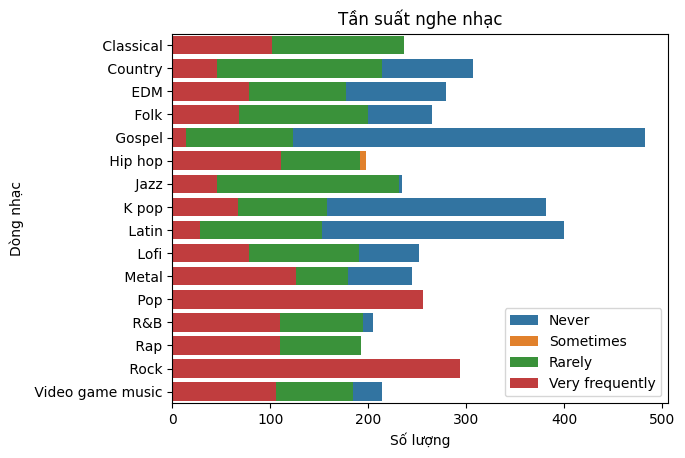

In [11]:
frequency_df = df.filter(regex='Frequency')
frequency_df.rename(columns=lambda x: x.replace('Frequency', ''), inplace=True)
frequency_df.rename(columns=lambda x: x.replace('[', '').replace(']', ''), inplace=True)
frequency_df = frequency_df.replace(label_frequency)
melted_df = frequency_df.melt()
sns.countplot(data=melted_df, y='variable', order=melted_df['variable'].value_counts().index, hue='value', dodge=False)
plt.legend(loc='lower right')
plt.title('Tần suất nghe nhạc')
plt.xlabel('Số lượng')
plt.ylabel('Dòng nhạc')
plt.show()


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>7. Việc nghe nhạc có giúp cải thiện sức khỏe tinh thần của mọi người hay không?  </b></font>

<font color="red"><b>Answer:</b></font> <font color="red">Câu trả lời</font>

<font color="red"><b>Explanation:</b></font> <font color="red">Giải thích </font>

</div>

<Axes: ylabel='count'>

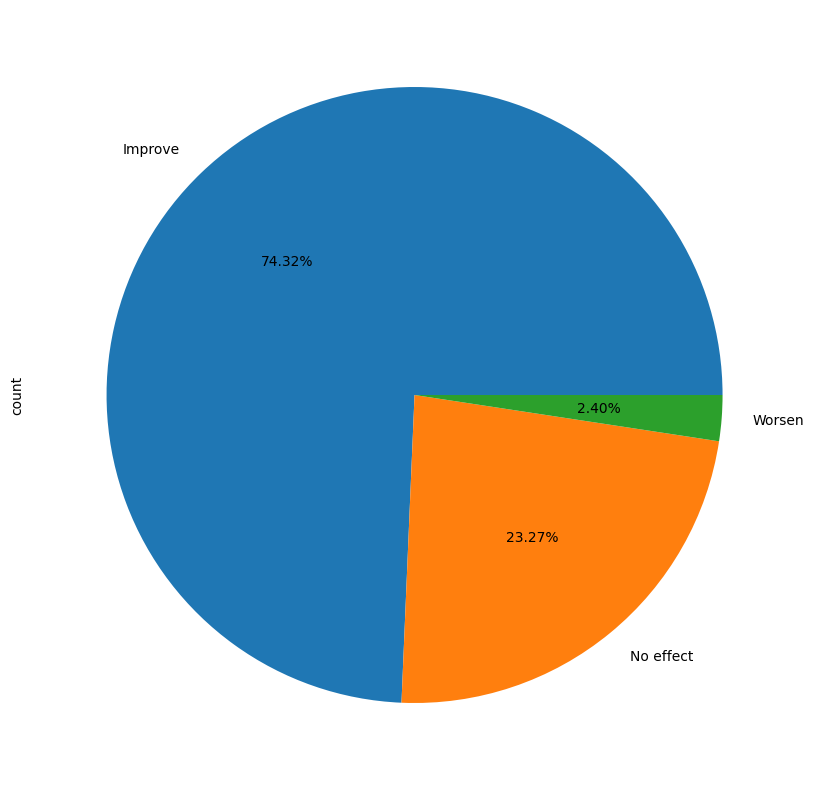

In [12]:
df['Music effects'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(10, 10))